### Practice and Review of Scikit-learn in ML, DL

In [21]:
!pip freeze

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.16
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.19.0
astropy==6.1.3
astropy-iers-data==0.2024.9.16.0.32.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.18.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.2
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.3
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.

In [44]:
from sklearn.datasets import load_diabetes

In [64]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [46]:
X, y = load_diabetes(return_X_y=True)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
### when not only simple model, need other process. the pipeline itself is the model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
### when alter with other part, expend the pipeline with model_selection
from sklearn.model_selection import GridSearchCV
### import visualization and data frame
import matplotlib.pylab as plt
import pandas as pd

In [48]:
# mod = KNeighborsRegressor(n_neighbors=1)
# mod2 = LinearRegression()

In [49]:
### if data need scaling, the whole pipeline become the model
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe.get_params()


{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [50]:
pipe2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])
pipe2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', LinearRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': LinearRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__positive': False}

In [51]:
mod = GridSearchCV(estimator=pipe,
             param_grid={
                 "model__n_neighbors":[1, 2, 3, 4, 5, 6]
             },
            cv = 3) ### cross validation

In [52]:
mod2 = GridSearchCV(estimator=pipe2,
             param_grid={
                 "model__fit_intercept":[True, False]
             },
             cv = 3)

In [53]:
mod.fit(X,y)
mod2.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False]})

In [54]:
pd.DataFrame(mod.cv_results_) ### pandas data frame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002690,0.000913,0.004208,0.001671,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,6
1,0.002235,0.000309,0.003419,0.001042,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,5
2,0.002145,0.000386,0.002702,0.000680,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,4
3,0.001707,0.000292,0.004726,0.003672,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,2
4,0.002747,0.000764,0.002706,0.000562,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,3
5,0.001792,0.000389,0.002764,0.000592,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,1


In [55]:
pd.DataFrame(mod2.cv_results_) ### pandas data frame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001878,0.000640,0.000796,0.000065,True,{'model__fit_intercept': True},0.469304,0.487253,0.509550,0.488702,0.016462,1
1,0.002174,0.000426,0.001251,0.000081,False,{'model__fit_intercept': False},-3.871533,-3.113959,-3.339779,-3.441757,0.317573,2


In [56]:
pipe.fit(X, y)
pipe2.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [57]:
pred_1 = mod.predict(X)
pred_1_1 = pipe.predict(X)


In [58]:
pred_2 = mod2.predict(X)
pred_2_1 = pipe2.predict(X)


In [59]:
import matplotlib.pyplot as plt

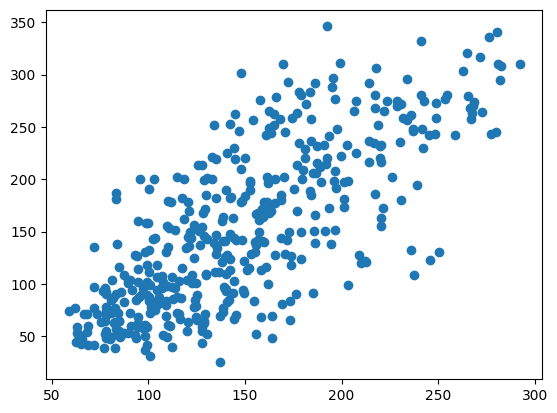

In [60]:
plt.scatter(pred_1, y)

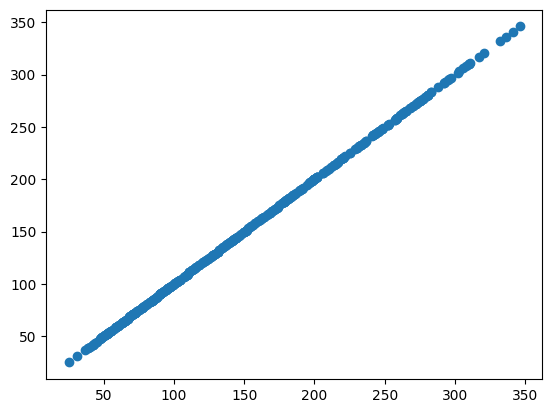

In [61]:
plt.scatter(pred_1_1, y)

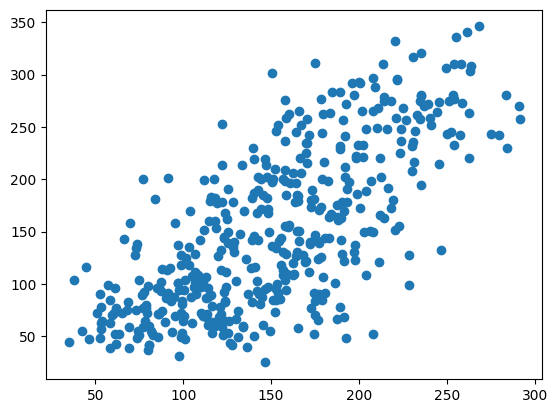

In [62]:
plt.scatter(pred_2, y)

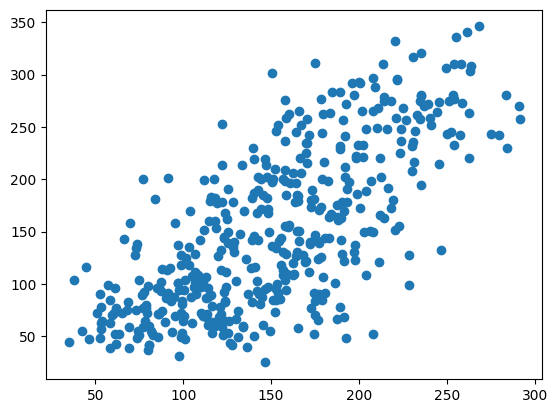

In [63]:
plt.scatter(pred_2_1, y)